# Ejercicio 2

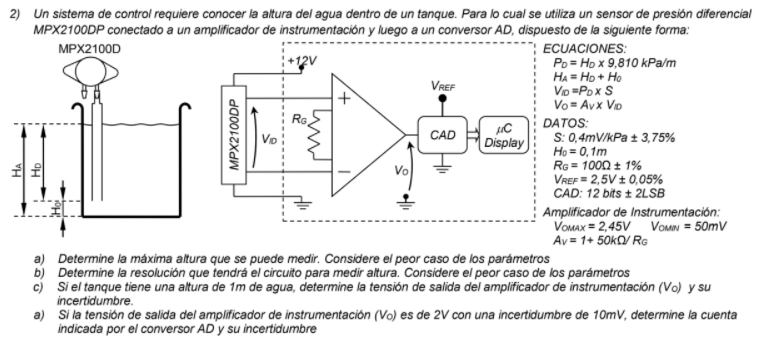

### Parte A

Ecuaciones que rigen la medicion:

- $P_D = H_D~.~9,810~\frac{kPa}{m}~~~~(1)$
- $H_A = H_D + H_0~~~~~~~~~~~~~~(2)$
- $V_{ID} = P_D~.~S~~~~~~~~~~~~~~~~~(3)$
- $V_O = A_V~.~V_{ID}~~~~~~~~~~~~~~~(4)$

Cuentas indicadas:

- $C_i = 2^N~.~\frac{V_{O}}{V_{REF}}~~~~(5)$

Remplazando (4) en $V_O$:

$$
C_i = 2^N~.~\frac{A_V~.~V_{ID}}{V_{REF}}
$$

Remplazando (3) en $V_{ID}$:

$$
C_i = 2^N~.~\frac{A_V~.~P_D~.~S}{V_{REF}}
$$

Remplazando (1) en $P_D$:

$$
C_i = 2^N~.~\frac{A_V~.~H_D~.~9,810~\frac{kPa}{m}~.~S}{V_{REF}}
$$

Despejando $H_D$:

$$
H_D = \frac{1}{2^N}~.~\frac{C_i~.~V_{REF}}{A_V~.~S~.~9,810~\frac{kPa}{m}} = \frac{1}{2^N}~.~\frac{C_i~.~V_{REF}}{(1 + \frac{50~k\Omega}{R_G})~.~S~.~9,810~\frac{kPa}{m}}
$$

Calculando la altura superior minima del sensor:

$$
H_{D_{sup}} = \frac{V_{O_{MAX}}}{(1 + \frac{50~k\Omega}{R_{G_{MIN}}})~.~S_{MAX}~.~9,810~\frac{kPa}{m}}
$$

Siendo:

$$
V_{O_{MAX}} = 2,45~V
$$

$$
R_{G_{MIN}} = 100~\Omega - 1\% = 99~\Omega
$$

$$
S_{MAX} = 0,4~\frac{mV}{kPa} + 3,75\% = 0,415~\frac{mV}{kPa}
$$

In [1]:
VO_MAX = 2.45        #[V]
RG_MIN = 99          #[ohm]
S_MAX  = 0.415e-3    #[V/kPa]

hd_sup = VO_MAX / ( ( 1 + ( 50e3 / RG_MIN ) ) * S_MAX * 9.810 )
print("El valor superior de altura minimo del sensor es: {} m".format(hd_sup))

El valor superior de altura minimo del sensor es: 1.189200594495277 m


Calculando la altura inferior maxima del sensor:

$$
H_{D_{inf}} = \frac{V_{O_{MIN}}}{(1 + \frac{50~k\Omega}{R_{G_{MAX}}})~.~S_{MIN}~.~9,810~\frac{kPa}{m}}
$$

Siendo:

$$
V_{O_{MIN}} = 50~mV
$$

$$
R_{G_{MAX}} = 100~\Omega + 1\% = 101~\Omega
$$

$$
S_{MIN} = 0,4~\frac{mV}{kPa} - 3,75\% = 0,385~\frac{mV}{kPa}
$$

In [2]:
VO_MIN = 50       #[mV]
RG_MAX = 101      #[ohm]
S_MIN  = 0.385    #[mV/kPa]

hd_inf = VO_MIN / ( ( 1 + ( 50e3 / RG_MAX ) ) * S_MIN * 9.810 )
print("El valor inferior de altura maximo del sensor es: {} m".format(hd_inf))

El valor inferior de altura maximo del sensor es: 0.026687951941325446 m


Siendo la altura maxima altura medible:

$$
H_A = H_D + H_0
$$

In [3]:
H0 = 0.1    #[m]

ha_sup = hd_sup + H0
ha_min = hd_inf + H0

print("La maxima altura medible es: {} m".format(ha_sup))
print("La minima altura medible es: {} m".format(ha_min))

La maxima altura medible es: 1.2892005944952771 m
La minima altura medible es: 0.12668795194132546 m


### Parte B

Siendo la resolucion del circuito:

$$
\Delta H = \frac{1}{2^N}~.~\frac{V_{REF_{MAX}}}{(1 + \frac{50~k\Omega}{R_{G_{MAX}}})~.~S_{MIN}~.~9,810~\frac{kPa}{m}}
$$

In [4]:
N = 12                #[bits]
VREF_MAX = 2.50125    #[V]

delta_h = ( 1 / 2 ** N) * ( VREF_MAX / ( ( 1 + ( 50e3 / RG_MAX ) ) * S_MIN * 9.810 ) )
print("El valor de resolucion del circuito es: {} m".format(delta_h))

El valor de resolucion del circuito es: 3.25943553677931e-07 m


### Parte C

Remplazando (3) en (4):

$$
V_O = A_V~.~P_D~.~S
$$

Remplazando $P_D$ con (1):

$$
V_O = A_V~.~S~.~H_D~.~9,810~\frac{kPa}{m}
$$

Remplazando $H_D$ con (2):

$$
V_O = (H_A - H_0)~.~A_V~.~S~.~9,810~\frac{kPa}{m} = (H_A - H_0)~.~(1 + \frac{50~k\Omega}{R_G})~.~S~.~9,810~\frac{kPa}{m}
$$

In [5]:
HA = 1      #[m]
RG = 100    #[ohm]
S = 0.4     #[mV/kPa]

vo = ( HA - H0 ) * ( 1 + ( 50e3 / RG ) ) * S * 9.810
print("El valor de tension de salida del amplificador para 1 metro de agua es: {} mV".format(vo))

El valor de tension de salida del amplificador para 1 metro de agua es: 1769.3316000000002 mV


Siendo la incertidumbre combinada relativa de $V_O$:

$$
u_R(V_O) = \sqrt{u^2_R(S) + u^2_R(A_V)}
$$

Siendo:

$$
u_R(A_V) = \sqrt{(\frac{\partial A_V}{\partial R_G})^2~.~u^2(R_G)}~.~\frac{1}{A_V} = \sqrt{(\frac{-50~k\Omega}{R^2_G})^2~.~u^2(R_G)}~.~\frac{1}{A_V}
$$

In [6]:
from math import sqrt

U_RG = ( 0.01 / sqrt(3) )    #[ohm]

av = 1 + ( 50e3 / RG )
ur_s = ( 3.75 / 100 ) * ( 1 / sqrt(3) )
ur_av = ( 1 / av ) * sqrt( ( ( -50e3 / ( RG ** 2 ) ) ** 2 ) * ( U_RG ** 2 ) )

ur_vo = sqrt( ( ur_s ** 2 ) * ( ur_av ** 2 ) )

print("El valor de la incertidumbre combinada relativa de S es: {} ".format(ur_s))
print("El valor de la incertidumbre combinada relativa de AV es: {} ".format(ur_av))
print("El valor de la incertidumbre combinada relativa de VO es: {} ".format(ur_vo))

El valor de la incertidumbre combinada relativa de S es: 0.02165063509461097 
El valor de la incertidumbre combinada relativa de AV es: 5.7619787344274025e-05 
El valor de la incertidumbre combinada relativa de VO es: 1.2475049900199601e-06 


Debido a que se estan combinando 2 variables aleatorias, se expande con k = 2.

In [7]:
K = 2

U_vo = ur_vo * K * vo

print("La incertidumbre expandida de VO es: {} V".format(U_vo))

La incertidumbre expandida de VO es: 0.004414500000000001 V


Por lo tanto, se obtiene:

$$
V_O = (1769,33~;\pm~7,65)~mV
$$

### Parte D

Siendo las cuentas indicadas:

$$
C_i = 2^N~.~\frac{V_{O}}{V_{REF}}
$$

In [16]:
VO = 2          #[V]
VREF = 2.5      #[V]
U_VO = 10e-3    #[V]

ci = ( 2 ** N ) * ( VO / VREF )
print("El valor de cuentas indicado es: {} cuentas".format(ci))

El valor de cuentas indicado es: 3276.8 cuentas


Siendo la incertidumbre combinada relativa de las cuentas indicadas:

$$
u_R(C_i) = \sqrt{u^2_R(V_o) + u^2_R(ADC) + u^2_R(V_{REF})}
$$

Donde:

$$
u_R(ADC) = \frac{\Delta ADC}{\sqrt{3}~.~C_i}
$$

$$
u_R(V_o) = \frac{u_{V_o}}{V_o}
$$

$$
u_R(V_{REF}) = \frac{err_\%}{\sqrt{3}~.~100}
$$

In [14]:
D_ADC = 2

ur_adc = D_ADC / ( sqrt(3) * ci )
ur_vo = U_VO / VO
ur_vref =  0.05 / ( 100 * sqrt(3) )
ur_ci = sqrt( ur_vo ** 2 + ur_adc ** 2 + ur_vref ** 2)

print("El valor de la incertidumbre relativa de las cuentas indicadas es: {}".format(ur_ci))

El valor de la incertidumbre relativa de las cuentas indicadas es: 0.005020708085182348


Desexpandiendo con k = 2 por el teorema central del limite.

In [17]:
K = 2

U_ci = ur_ci * K * ci

print("El valor de la incertidumbre expandida de las cuentas indicadas es: {} cuentas".format(U_ci))

El valor de la incertidumbre expandida de las cuentas indicadas es: 32.90371250705103 cuentas


Por lo tanto, se obtiene:

$$
C_i = ( 3276~;~\pm 33 )~cuentas
$$